# Image Classification with CNN using Keras

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Task 1: Import Libraries

In [ ]:
import tensorflow as tf
import os
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

if not os.path.isdir('models'):
    os.mkdir('models')
    
print('TensorFlow version:', tf.__version__)
print('Is using GPU?', tf.test.is_gpu_available())

TensorFlow version: 2.2.0
Is using GPU? True


# Task 2: Preprocess Data

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_gen=ImageDataGenerator(rescale=1./255.,horizontal_flip=True,vertical_flip=True)
test_gen=ImageDataGenerator(rescale=1./255.)

In [ ]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.cifar10.load_data()

In [ ]:
x_train.shape,x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [ ]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [ ]:
y_train=tf.keras.utils.to_categorical(y_train)
y_test=tf.keras.utils.to_categorical(y_test)

In [ ]:
train=tf.keras.preprocessing.image.NumpyArrayIterator(x_train,y_train,train_gen,batch_size=256,shuffle=True)
test=tf.keras.preprocessing.image.NumpyArrayIterator(x_test,y_test,test_gen,batch_size=256)

# Task 3: Visualize Examples

In [ ]:
class_names = ['aeroplane', 'car', 'bird','cat','dear','dog','frog','horse','ship','truck']
def show_rand_ex(x,y,p):
  i=np.random.choice(x.shape[0],10,replace=False)
  x=x[i]
  y=y[i]
  p=p[i]
  plt.figure(figsize=(10,5))
  for i in range(10):
    plt.subplot(2,5,1+i)
    plt.imshow(x[i])
    plt.xticks([])
    plt.yticks([])
    col='green' if np.argmax(y[i])==np.argmax(p[i]) else 'red'
    plt.xlabel(class_names[np.argmax(p[i])],color=col)
  plt.show()

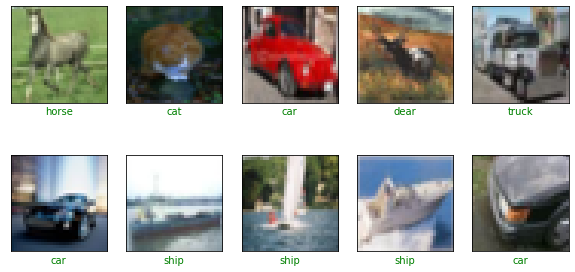

In [ ]:
show_rand_ex(x_train,y_train,y_train)

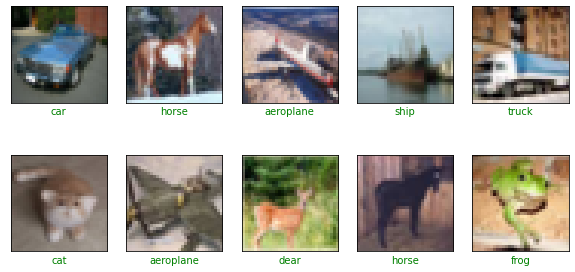

In [ ]:
show_rand_ex(x_test,y_test,y_test)

# Task 4: Create Model

In [188]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import Dropout, Flatten, Input, Dense
def cifar_model():
  def add_conv_block(model,num_filters):
    model.add(Conv2D(num_filters,3,activation='relu',padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(num_filters,3,activation='relu'))
    model.add(MaxPooling2D(2,2))
    model.add(Dropout(0.5))
    return model
  model=tf.keras.models.Sequential()
  model.add(Input(shape=(32,32,3)))
  model=add_conv_block(model,32)
  model=add_conv_block(model,64)
  model.add(Flatten())
  model.add(Dense(512,activation='relu'))
  model.add(Dense(512,activation='relu'))
  model.add(Dense(10,activation='softmax'))
  model.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(0.001),metrics=['accuracy'])
  return model
model=cifar_model()
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_116 (Conv2D)          (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_58 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_117 (Conv2D)          (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_58 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_58 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_118 (Conv2D)          (None, 15, 15, 64)        18496     
_________________________________________________________________
batch_normalization_59 (Batc (None, 15, 15, 64)      

In [189]:
callback=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=15)
save=tf.keras.callbacks.ModelCheckpoint('/content/drive/My Drive/WorkSpace/Projects/CIFAR-10NeuralNetwork/models/model_{val_accuracy:.3f}.h5',save_best_only=True,save_weights_only=False,monitor='val_accuracy')


# Task 5: Train the Model

In [190]:
history=model.fit(train,steps_per_epoch=100,epochs=10000,callbacks=[callback,save],validation_data=test,validation_steps=20,shuffle=True)

Epoch 1/10000
100/100 [==============================] - 5s 47ms/step - loss: 2.0067 - accuracy: 0.2828 - val_loss: 2.6442 - val_accuracy: 0.1018
Epoch 2/10000
100/100 [==============================] - 4s 44ms/step - loss: 1.5793 - accuracy: 0.4087 - val_loss: 3.4324 - val_accuracy: 0.1051
Epoch 3/10000
100/100 [==============================] - 5s 45ms/step - loss: 1.4636 - accuracy: 0.4564 - val_loss: 2.6378 - val_accuracy: 0.1906
Epoch 4/10000
100/100 [==============================] - 4s 45ms/step - loss: 1.3652 - accuracy: 0.4992 - val_loss: 2.2811 - val_accuracy: 0.2375
Epoch 5/10000
100/100 [==============================] - 4s 45ms/step - loss: 1.2763 - accuracy: 0.5361 - val_loss: 1.5633 - val_accuracy: 0.4287
Epoch 6/10000
100/100 [==============================] - 5s 45ms/step - loss: 1.2154 - accuracy: 0.5605 - val_loss: 1.3127 - val_accuracy: 0.5289
Epoch 7/10000
100/100 [==============================] - 4s 44ms/step - loss: 1.1731 - accuracy: 0.5758 - val_loss: 1.2340 -

In [191]:
model.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(0.0001),metrics=['accuracy'])
model.fit(train,steps_per_epoch=100,epochs=10000,callbacks=[callback,save],validation_data=test,validation_steps=20,shuffle=True)

Epoch 1/10000
100/100 [==============================] - 5s 46ms/step - loss: 0.5385 - accuracy: 0.8081 - val_loss: 0.6022 - val_accuracy: 0.7973
Epoch 2/10000
100/100 [==============================] - 5s 45ms/step - loss: 0.5245 - accuracy: 0.8120 - val_loss: 0.6064 - val_accuracy: 0.7977
Epoch 3/10000
100/100 [==============================] - 4s 45ms/step - loss: 0.5174 - accuracy: 0.8150 - val_loss: 0.5883 - val_accuracy: 0.8012
Epoch 4/10000
100/100 [==============================] - 4s 45ms/step - loss: 0.5137 - accuracy: 0.8155 - val_loss: 0.6026 - val_accuracy: 0.8021
Epoch 5/10000
100/100 [==============================] - 4s 45ms/step - loss: 0.5117 - accuracy: 0.8145 - val_loss: 0.5949 - val_accuracy: 0.8043
Epoch 6/10000
100/100 [==============================] - 4s 43ms/step - loss: 0.5017 - accuracy: 0.8220 - val_loss: 0.5972 - val_accuracy: 0.8041
Epoch 7/10000
100/100 [==============================] - 4s 43ms/step - loss: 0.5086 - accuracy: 0.8190 - val_loss: 0.5926 -

In [192]:
model.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(0.00001),metrics=['accuracy'])
model.fit(train,steps_per_epoch=100,epochs=10000,callbacks=[callback,save],validation_data=test,validation_steps=20,shuffle=True)

Epoch 1/10000
100/100 [==============================] - 4s 45ms/step - loss: 0.4727 - accuracy: 0.8301 - val_loss: 0.5880 - val_accuracy: 0.8002
Epoch 2/10000
100/100 [==============================] - 4s 43ms/step - loss: 0.4619 - accuracy: 0.8352 - val_loss: 0.5889 - val_accuracy: 0.8012
Epoch 3/10000
100/100 [==============================] - 4s 43ms/step - loss: 0.4705 - accuracy: 0.8314 - val_loss: 0.5873 - val_accuracy: 0.8027
Epoch 4/10000
100/100 [==============================] - 4s 43ms/step - loss: 0.4665 - accuracy: 0.8334 - val_loss: 0.5901 - val_accuracy: 0.8023
Epoch 5/10000
100/100 [==============================] - 4s 43ms/step - loss: 0.4729 - accuracy: 0.8313 - val_loss: 0.5882 - val_accuracy: 0.8047
Epoch 6/10000
100/100 [==============================] - 5s 53ms/step - loss: 0.4678 - accuracy: 0.8327 - val_loss: 0.5876 - val_accuracy: 0.8053
Epoch 7/10000
100/100 [==============================] - 4s 43ms/step - loss: 0.4684 - accuracy: 0.8300 - val_loss: 0.5874 -

# Task 6: Final Predictions

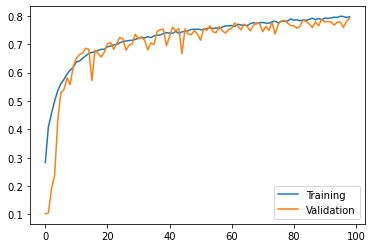

In [193]:
accs=history.history['accuracy']
val_accs=history.history['val_accuracy']
plt.plot(range(len(accs)),accs,label='Training')
plt.plot(range(len(accs)),val_accs,label='Validation')
plt.legend()
plt.show()

In [194]:
model_loaded=tf.keras.models.load_model('/content/drive/My Drive/WorkSpace/Projects/CIFAR-10NeuralNetwork/models/model_0.807.h5')

In [208]:
model_loaded.evaluate(x_test/255.,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.5773 - accuracy: 0.8091


[0.5772683620452881, 0.8090999722480774]

In [210]:
preds=model_loaded.predict(x_test/255.)

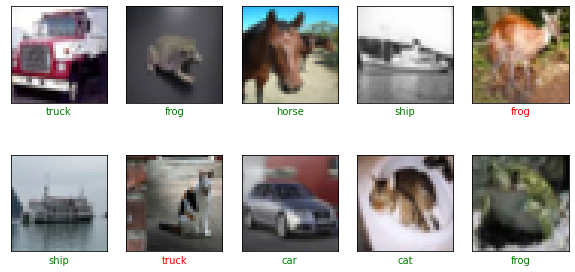

In [211]:
show_rand_ex(x_test,y_test,preds)